**Pareja 6**

**Daniel Mohedano**

**Silvia Sopeña**

# Apartado 1

### Generación de la población inicial

La generación de la población inicial es relativamente sencilla. En primer lugar, en el constructor antes de la propia generación de la población, se inicializan algunas variables auxiliares que contienen el número máximo de de reglas por individuo y además se calcula la longitud de las reglas en bits, teniendo en cuenta los posibles valores de cada atributo del dataset. 

Después, cada individuo de la población se genera de forma aleatoria. Para ello hay dos pasos:
- Elegir de forma aleatoria la cantidad de reglas que compondran este individuo en concreto.
- Inicializar cada una de las reglas con bits aleatorios (asegurandonos de que no se generan reglas con todos los valores a 0 o todos a 1).

### Mecanismo de cruce implementado

Se han implementado dos mecanismos de cruce distintos que pueden ser elegidos pasando una string al constructor de la clase (`inter` o `intra`). 

- `intra`: Este mecanismo de cruce se basa en únicamente cruzar los valores de una sola regla para ambos individuos. Por ello, en primer lugar se elige una regla aleatoria de cada uno de los dos individuos. Y posteriormente se genera un punto de cruce aleatorio y se cruzan los individuos únicamente en esa regla. Por lo tanto, tras el cruce, ambos individuos poseen las mismas reglas que antes, excepto una de ellas que ha sido modificada.
- `inter`: Mecanismo más parecido al visto en clase. Se cruzan los individuos de forma global con reglas completas. Para ello se elige una regla de cruce aleatoriamente y se cruzan las propias reglas en ese punto. Es decir, el primer individuo mantendrá las mismas reglas que quedasen a la izquierda del punto de cruce y obtendrá a la derecha del punto aquellas reglas del individuo 2, y viceversa. 

### Mecanismo de mutación implementado

Para la mutación se han implementado también dos mecanismos distintos. 

- `std_single`: Mutación estándar individual. Esto implica que previamente a la mutación se elige una regla que se mutará. Por lo tanto, solo los bits de esa regla podrán ser mutados. Cada bit será mutado con una probabilidad de $\frac{1}{l_{regla}}$

- `std_multi`: Parecida a la anterior pero en este caso la mutación no se limita a una sola regla. Cada bit del individuo se muta con una probabilidad de $\frac{1}{n_{reglas}*l_{regla}}$

Además, en el propio bucle de entrenamiento cada individuo es mutado con una probabilidad de $\frac{1}{n_{poblacion}}$.

### Mecanismo de clasificación implementado

El método de evaluación de las reglas de un individuo sobre un dato es bastante sencillo también. Individualmente cada regla es evaluada con los datos. Esto puede dar dos posibles resultados: clasificación (de cualquiera de las dos clases) o no clasificación, en cuyo caso se devuelve `-1`.

Una vez se han evaluado todas las reglas del individuo sobre el dato, se cuentan cuantas clasificaciones de Clase 1 y 2 hay. Si hay más de Clase 1, se clasifica como Clase 1. Si hay más de Clase 2, se clasifica como Clase 2. Es decir, se realiza un voto por mayoría. En caso de empate se clasifica como Clase 2 por comodidad, aunque también se podría implementar un sistema aleatorio para la decisión. Por último, si ninguna regla se ha activado el dato directamente no se clasifica y se devuelve `-1`. A efectos prácticos, tanto en entrenamiento como validación, esto hace que se cuente como un error. Si fuera necesaria una clasificación de forma obligatoria, se podría modificar el código para que siguiese algún otro patrón (la clase con mayor a priori, aleatorio, etc.)

# Apartado 2&3

A continuación se ejecutará una serie de pruebas con el objetivo de comprobar que configuración del clasificador es mejor para cada dataset. En vez de realizar todas las pruebas simultaneamente, hemos decidido ir haciéndolas poco a poco para poder analizar mejor el impacto de cada decisión en los resultados. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from Datos import Datos
from clasificador import ClasificadorNaiveBayes, AlgoritmoGenetico
from EstrategiaParticionado import ValidacionSimple
import numpy as np
import pandas as pd

In [2]:
datos_tic_tac = Datos('data/tic-tac-toe.data')
datos_titanic = Datos('data/titanic.data')

particion = ValidacionSimple(0.2, 1)
seed = 29

n_poblacion = [50, 150]
n_epochs = [100, 200]
n_reglas = [2, 5, 8]

cruce = ['inter', 'intra']
mutacion = ['std_single', 'std_multi']

In [3]:
def valores_posibles(datos):
    vals = []

    for col in datos:
        vals.append(list(datos[col].unique()))

    return vals[:-1]

In [4]:
vals_por_attr_tic = valores_posibles(datos_tic_tac.datos)
vals_por_attr_titanic = valores_posibles(datos_titanic.datos)

En primer lugar, realizamos un test para comprobar que implementación de los operadores genéticos es mejor para cada dataset. 

In [10]:
def calculate_results_operadores(datos, vals, cruce, mutacion):
    results = []
    best_inds = []
    for c in cruce:
        result_parcial = []
        best_inds_parcial = []
        for m in mutacion:
            clas = AlgoritmoGenetico(vals, m=5, cruce=c, mutacion=m, n=100, n_epoch=150, debug=True)
            error, std = clas.validacion(particion, datos, seed)
            result_parcial.append('{:.6f} +/- {:.6f}'.format(error, std))
            best_inds_parcial.append(clas.best_ind)
        results.append(result_parcial)
        best_inds.append(best_inds_parcial)
        
    return results, best_inds

def results_dataframe_operadores(results, name, cruce, mutacion):
    df = pd.DataFrame(results,
                           columns=[f'Mutación {x}' for x in mutacion],
                           index=[f'Cruce {x}' for x in cruce])
    df = df.style.set_caption(name)
    return df

In [11]:
results_tic_tac_operadores, best_inds_tic_tac_operadores = calculate_results_operadores(datos_tic_tac, vals_por_attr_tic, cruce, mutacion)
results_tita_operadores, best_inds_tita_operadores = calculate_results_operadores(datos_titanic, vals_por_attr_titanic, cruce, mutacion)

df_tic_operadores = results_dataframe_operadores(results_tic_tac_operadores, 'Tic-Tac-Toe', cruce, mutacion)
df_tita_operadores = results_dataframe_operadores(results_tita_operadores, 'Titanic', cruce, mutacion)       
        

GEN 000: Max=0.0860, Mean=0.0037, Std=0.01056790
GEN 005: Max=0.1095, Mean=0.0970, Std=0.01065861
GEN 010: Max=0.1591, Mean=0.1080, Std=0.01156679
GEN 015: Max=0.1591, Mean=0.1278, Std=0.02208436
GEN 020: Max=0.1695, Mean=0.1444, Std=0.02196368
GEN 025: Max=0.1943, Mean=0.1602, Std=0.01116642
GEN 030: Max=0.1943, Mean=0.1702, Std=0.01323370
GEN 035: Max=0.1943, Mean=0.1829, Std=0.01525243
GEN 040: Max=0.1943, Mean=0.1924, Std=0.00811111
GEN 045: Max=0.2073, Mean=0.1929, Std=0.00958047
GEN 050: Max=0.2073, Mean=0.1942, Std=0.00979530
GEN 055: Max=0.2073, Mean=0.1995, Std=0.00638720
GEN 060: Max=0.2373, Mean=0.2020, Std=0.00862913
GEN 065: Max=0.2477, Mean=0.2168, Std=0.02168380
GEN 070: Max=0.2595, Mean=0.2290, Std=0.02234026
GEN 075: Max=0.2595, Mean=0.2398, Std=0.02468953
GEN 080: Max=0.3012, Mean=0.2519, Std=0.01832362
GEN 085: Max=0.3012, Mean=0.2712, Std=0.02601459
GEN 090: Max=0.3312, Mean=0.2875, Std=0.02807550
GEN 095: Max=0.4081, Mean=0.3129, Std=0.03930827
GEN 100: Max=0.4081,

GEN 045: Max=0.7634, Mean=0.7633, Std=0.00130763
GEN 050: Max=0.7646, Mean=0.7623, Std=0.01117612
GEN 055: Max=0.7658, Mean=0.7616, Std=0.01988123
GEN 060: Max=0.7742, Mean=0.7555, Std=0.02734939
GEN 065: Max=0.7766, Mean=0.7559, Std=0.02604862
GEN 070: Max=0.7766, Mean=0.7602, Std=0.02492698
GEN 075: Max=0.7766, Mean=0.7570, Std=0.02798838
GEN 080: Max=0.7766, Mean=0.7712, Std=0.00748870
GEN 085: Max=0.7766, Mean=0.7715, Std=0.00842167
GEN 090: Max=0.7766, Mean=0.7702, Std=0.00989601
GEN 095: Max=0.7766, Mean=0.7728, Std=0.00798670
GEN 100: Max=0.7766, Mean=0.7716, Std=0.01045161
GEN 105: Max=0.7766, Mean=0.7754, Std=0.00427771
GEN 110: Max=0.7766, Mean=0.7754, Std=0.00405157
GEN 115: Max=0.7766, Mean=0.7748, Std=0.00603429
GEN 120: Max=0.7766, Mean=0.7763, Std=0.00183427
GEN 125: Max=0.7766, Mean=0.7766, Std=0.00000000
GEN 130: Max=0.7766, Mean=0.7766, Std=0.00000000
GEN 135: Max=0.7766, Mean=0.7762, Std=0.00288168
GEN 140: Max=0.7766, Mean=0.7750, Std=0.00597821
GEN 145: Max=0.7766,

In [12]:
display(df_tic_operadores)
display(df_tita_operadores)

,Mutación std_single,Mutación std_multi
Cruce inter,0.445026 +/- 0.000000,0.481675 +/- 0.000000
Cruce intra,0.277487 +/- 0.000000,0.298429 +/- 0.000000


,Mutación std_single,Mutación std_multi
Cruce inter,0.215311 +/- 0.000000,0.224880 +/- 0.000000
Cruce intra,0.220096 +/- 0.000000,0.220096 +/- 0.000000


- En cuanto al tipo de cruce, parece que el cruce tipo `intra` consigue mejores resultados en ambos conjuntos de datos, siendo la mejora mucho más notable en el conjunto `Tic-Tac-Toe`.

- En cuanto al tipo de mutación, los resultados son muy parejos. Aunque la mutación de tipo `std_single` parece conseguir mejores resultados, el cambio es muy pequeño.

Por lo tanto, de ahora en adelante los clasificadores se configuraran con estos dos operadores genéticos. 

El siguiente paso sería comprobar el tamaño de la población y la cantidad de épocas que ejecutar el entrenamiento. Parece lógico pensar que cuanto mayores sean estos valores, mejor debería de comportarse el clasificador ya que tendría una mayor pool genética y además tendrían más tiempo para evolucionar los cromosomas. Aún así, comprobemos si esto es verdad:

In [5]:
def calculate_results_n(datos, vals, n_epochs, n_poblacion, cruce, mutacion):
    results = []
    best_inds = []
    for epoch in n_epochs:
        result_parcial = []
        best_inds_parcial = []
        for n_pob in n_poblacion:
            clas = AlgoritmoGenetico(vals, m=5, cruce=cruce, mutacion=mutacion, n=n_pob, n_epoch=epoch, debug=True)
            error, std = clas.validacion(particion, datos, seed)
            result_parcial.append('{:.6f} +/- {:.6f}'.format(error, std))
            best_inds_parcial.append(clas.best_ind)
        results.append(result_parcial)
        best_inds.append(best_inds_parcial)
        
    return results, best_inds

def results_dataframe_n(results, name, n_epochs, n_poblacion):
    df = pd.DataFrame(results,
                           columns=[f'n = {x}' for x in n_poblacion],
                           index=[f'n_epochs = {x}' for x in n_epochs])
    df = df.style.set_caption(name)
    return df

In [28]:
results_tic_n, best_inds_tic_n = calculate_results_n(datos_tic_tac, vals_por_attr_tic, n_epochs, n_poblacion, 'intra', 'std_single')
results_tita_n, best_inds_tita_n = calculate_results_n(datos_titanic, vals_por_attr_titanic, n_epochs, n_poblacion, 'intra', 'std_single')

df_tic_n = results_dataframe_n(results_tic_n, 'Tic-Tac-Toe', n_epochs, n_poblacion)
df_tita_n = results_dataframe_n(results_tita_n, 'Titanic', n_epochs, n_poblacion) 

GEN 000: Max=0.0417, Mean=0.0029, Std=0.00681966
GEN 005: Max=0.0860, Mean=0.0509, Std=0.01803462
GEN 010: Max=0.1486, Mean=0.0726, Std=0.02518053
GEN 015: Max=0.2060, Mean=0.1272, Std=0.04669873
GEN 020: Max=0.2295, Mean=0.1634, Std=0.04316095
GEN 025: Max=0.2647, Mean=0.1936, Std=0.03385637
GEN 030: Max=0.3090, Mean=0.2212, Std=0.04418395
GEN 035: Max=0.3924, Mean=0.2822, Std=0.04601966
GEN 040: Max=0.4042, Mean=0.3284, Std=0.05208917
GEN 045: Max=0.4107, Mean=0.3568, Std=0.05779654
GEN 050: Max=0.4107, Mean=0.3874, Std=0.03936577
GEN 055: Max=0.4107, Mean=0.3824, Std=0.05208538
GEN 060: Max=0.4107, Mean=0.3855, Std=0.03801522
GEN 065: Max=0.4107, Mean=0.3748, Std=0.04922232
GEN 070: Max=0.4107, Mean=0.3715, Std=0.05772428
GEN 075: Max=0.4107, Mean=0.3801, Std=0.04540391
GEN 080: Max=0.4107, Mean=0.3851, Std=0.05280024
GEN 085: Max=0.4107, Mean=0.3862, Std=0.03997449
GEN 090: Max=0.4107, Mean=0.3930, Std=0.05107966
GEN 095: Max=0.4107, Mean=0.3976, Std=0.02784907
GEN 099: Max=0.4107,

GEN 095: Max=0.7993, Mean=0.6324, Std=0.14140475
GEN 099: Max=0.7993, Mean=0.5968, Std=0.13625770
GEN 000: Max=0.5341, Mean=0.1890, Std=0.13820824
GEN 005: Max=0.6631, Mean=0.4677, Std=0.12472666
GEN 010: Max=0.6762, Mean=0.5270, Std=0.12916627
GEN 015: Max=0.6810, Mean=0.5363, Std=0.10685083
GEN 020: Max=0.6894, Mean=0.5449, Std=0.09747023
GEN 025: Max=0.6989, Mean=0.5203, Std=0.11037881
GEN 030: Max=0.7168, Mean=0.5539, Std=0.09123552
GEN 035: Max=0.7419, Mean=0.5843, Std=0.06572992
GEN 040: Max=0.7419, Mean=0.5774, Std=0.09294765
GEN 045: Max=0.7491, Mean=0.5928, Std=0.10302843
GEN 050: Max=0.7515, Mean=0.6323, Std=0.09262497
GEN 055: Max=0.7611, Mean=0.6244, Std=0.10978383
GEN 060: Max=0.7611, Mean=0.6255, Std=0.10220918
GEN 065: Max=0.7611, Mean=0.6124, Std=0.10079729
GEN 070: Max=0.7611, Mean=0.6022, Std=0.11682498
GEN 075: Max=0.7611, Mean=0.5809, Std=0.08204537
GEN 080: Max=0.7611, Mean=0.6054, Std=0.09263191
GEN 085: Max=0.7611, Mean=0.5710, Std=0.10383642
GEN 090: Max=0.7611,

In [29]:
display(df_tic_n)
display(df_tita_n)

,n = 50,n = 150
n_epochs = 100,0.549738 +/- 0.000000,0.293194 +/- 0.000000
n_epochs = 200,0.240838 +/- 0.000000,0.293194 +/- 0.000000


,n = 50,n = 150
n_epochs = 100,0.234450 +/- 0.000000,0.210526 +/- 0.000000
n_epochs = 200,0.210526 +/- 0.000000,0.210526 +/- 0.000000


Los resultados obtenidos, aunque se ajustan a lo que esperábamos, tienen también bastantes curiosidades:

- Los resultados son consistentemente mejores para un mayor tamaño de la población, aunque el cambio es mucho más grande en el dataset de `Tic-Tac-Toe` que en `Titanic`. 
- En cuanto al número de épocas, también parece que una mayor cantidad de épocas mejora el rendimiento del clasificador. Aún así, sucede algo interesante. Para el mayor tamaño de población, la cantidad de épocas parece no tener efecto. Esto probablemente se deba a que como la población es lo suficientemente grande, los cromosomas evolucionan más fácilmente a la solución óptima y por lo tanto necesitan menos épocas para llegar a ese punto. 

Tras ver estos resultados, los clasificadores de ahora en adelante se configuraran con 150 para el tamaño de la población y con 200 épocas (aunque este último podría ser cambiado por 100 perfectamente).

Por último, el parámetro que queda por analizar es la cantidad máxima de reglas permitidas para un solo individuo.

In [16]:
def calculate_results_m(datos, vals, n_epochs, n_poblacion, cruce, mutacion, ms):
    results = []
    best_inds = []
    for m in ms:
        clas = AlgoritmoGenetico(vals, m=m, cruce=cruce, mutacion=mutacion, n=n_poblacion, n_epoch=n_epochs, debug=True)
        error, std = clas.validacion(particion, datos, seed)
        results.append('{:.6f} +/- {:.6f}'.format(error, std))
        best_inds.append(clas.best_ind)
        
    return results, best_inds

def results_dataframe_m(results, name, ms):
    df = pd.DataFrame(results,
                           index=[f'm = {x}' for x in ms])
    df = df.style.set_caption(name)
    return df

In [17]:
results_tic_m, best_inds_tic_m = calculate_results_m(datos_tic_tac, vals_por_attr_tic, 200, 150, 'intra', 'std_single', n_reglas)
results_tita_m, best_inds_tita_m = calculate_results_m(datos_titanic, vals_por_attr_titanic, 200, 150, 'intra', 'std_single', n_reglas)

GEN 000: Max=0.0704, Mean=0.0020, Std=0.00831376
GEN 005: Max=0.3468, Mean=0.1279, Std=0.06981645
GEN 010: Max=0.4681, Mean=0.2685, Std=0.10885707
GEN 015: Max=0.5254, Mean=0.3750, Std=0.09429438
GEN 020: Max=0.5828, Mean=0.4453, Std=0.08705320
GEN 025: Max=0.6115, Mean=0.4736, Std=0.09535708
GEN 030: Max=0.6402, Mean=0.5262, Std=0.08292273
GEN 035: Max=0.6402, Mean=0.5547, Std=0.08338692
GEN 040: Max=0.6402, Mean=0.5811, Std=0.07788883
GEN 045: Max=0.6402, Mean=0.6071, Std=0.06134704
GEN 050: Max=0.6402, Mean=0.6132, Std=0.05817707
GEN 055: Max=0.6532, Mean=0.6241, Std=0.04523328
GEN 060: Max=0.6532, Mean=0.6267, Std=0.05009106
GEN 065: Max=0.6532, Mean=0.6108, Std=0.08399434
GEN 070: Max=0.6780, Mean=0.6162, Std=0.08066124
GEN 075: Max=0.6780, Mean=0.5982, Std=0.11123877
GEN 080: Max=0.6780, Mean=0.6224, Std=0.08737951
GEN 085: Max=0.6819, Mean=0.6085, Std=0.10637837
GEN 090: Max=0.7001, Mean=0.5961, Std=0.11233335
GEN 095: Max=0.7001, Mean=0.6009, Std=0.11611327
GEN 100: Max=0.7001,

GEN 005: Max=0.6487, Mean=0.4635, Std=0.11920513
GEN 010: Max=0.6750, Mean=0.5275, Std=0.08063926
GEN 015: Max=0.7145, Mean=0.5567, Std=0.08257963
GEN 020: Max=0.7145, Mean=0.5627, Std=0.08346450
GEN 025: Max=0.7336, Mean=0.5748, Std=0.08811947
GEN 030: Max=0.7336, Mean=0.5752, Std=0.10520885
GEN 035: Max=0.7395, Mean=0.5749, Std=0.10833817
GEN 040: Max=0.7443, Mean=0.6017, Std=0.10754601
GEN 045: Max=0.7503, Mean=0.6054, Std=0.09754131
GEN 050: Max=0.7575, Mean=0.6170, Std=0.09228200
GEN 055: Max=0.7742, Mean=0.6135, Std=0.09811984
GEN 060: Max=0.7766, Mean=0.6033, Std=0.11107773
GEN 065: Max=0.7933, Mean=0.6122, Std=0.09806254
GEN 070: Max=0.7957, Mean=0.6389, Std=0.10710843
GEN 075: Max=0.7957, Mean=0.6259, Std=0.11192252
GEN 080: Max=0.7957, Mean=0.6307, Std=0.11217828
GEN 085: Max=0.7969, Mean=0.6462, Std=0.11026150
GEN 090: Max=0.7969, Mean=0.6279, Std=0.11621935
GEN 095: Max=0.7969, Mean=0.6342, Std=0.11907818
GEN 100: Max=0.7969, Mean=0.6346, Std=0.10722252
GEN 105: Max=0.7969,

In [18]:
df_tic_m = results_dataframe_m(results_tic_m, 'Tic-Tac-Toe', n_reglas)
df_tita_m = results_dataframe_m(results_tita_m, 'Titanic', n_reglas)

In [19]:
display(df_tic_m)
display(df_tita_m)

,0
m = 2,0.303665 +/- 0.000000
m = 5,0.272251 +/- 0.000000
m = 8,0.272251 +/- 0.000000


,0
m = 2,0.220096 +/- 0.000000
m = 5,0.215311 +/- 0.000000
m = 8,0.244019 +/- 0.000000


Se puede apreciar que a medida que hemos ido configurando los clasificadores, los errores obtenidos son cada vez más pequeños en las pruebas.

Además, para ambos conjuntos de datos parece que la cantidad máxima de reglas óptima está alrededor de 5.

Con los parámetros ya elegidos, en el siguiente apartado procederemos a realizar una última prueba para poder analizar el aspecto del mejor cromosoma de la última generación y también para poder observar la evolución del fitness de la población a lo largo de las generaciones.

# Apartado 4

In [21]:
clf_tic = AlgoritmoGenetico(vals_por_attr_tic, m=5, cruce='intra', mutacion='std_single', n=150, n_epoch=200, debug=True)
clf_tita = AlgoritmoGenetico(vals_por_attr_titanic, m=5, cruce='intra', mutacion='std_single', n=150, n_epoch=200, debug=True)

error_tic, std_tic = clf_tic.validacion(particion, datos_tic_tac, seed)
error_tita, std_tita = clf_tita.validacion(particion, datos_titanic, seed)

print(f'Dataset Tic-Tac-Toe Error: {error_tic} +/- {std_tic}')
print(f'Dataset Titanic Error: {error_tita} +/- {std_tita}')

GEN 000: Max=0.0860, Mean=0.0036, Std=0.00922637
GEN 005: Max=0.1760, Mean=0.0887, Std=0.03931348
GEN 010: Max=0.2712, Mean=0.1565, Std=0.05431577
GEN 015: Max=0.4237, Mean=0.2317, Std=0.08052314
GEN 020: Max=0.5984, Mean=0.3620, Std=0.09924794
GEN 025: Max=0.6402, Mean=0.4880, Std=0.10745791
GEN 030: Max=0.6402, Mean=0.5342, Std=0.12653695
GEN 035: Max=0.6415, Mean=0.5639, Std=0.10573010
GEN 040: Max=0.6415, Mean=0.5856, Std=0.08696065
GEN 045: Max=0.6428, Mean=0.5909, Std=0.08136799
GEN 050: Max=0.6454, Mean=0.6170, Std=0.05357354
GEN 055: Max=0.6532, Mean=0.6045, Std=0.07025219
GEN 060: Max=0.6532, Mean=0.5928, Std=0.07401454
GEN 065: Max=0.6571, Mean=0.6111, Std=0.05898559
GEN 070: Max=0.6597, Mean=0.6172, Std=0.05063267
GEN 075: Max=0.6623, Mean=0.6263, Std=0.03970975
GEN 080: Max=0.6623, Mean=0.6064, Std=0.06095944
GEN 085: Max=0.6701, Mean=0.6193, Std=0.05034124
GEN 090: Max=0.6701, Mean=0.6129, Std=0.05578236
GEN 095: Max=0.6728, Mean=0.6151, Std=0.06612517
GEN 100: Max=0.6728,

En primer lugar, como se puede observar, el error obtenido para ambos conjuntos de datos no supera el 30%, lo cual es bastante buen resultado teniendo en cuenta los que se obtenían originalmente sin configurar de forma óptima el clasificador. Analicemos ahora el aspecto de los mejores cromosomas:

In [35]:
print('Tic-Tac-Toe:')
for r in clf_tic.best_ind:
    print('\t', r)
print('Titanic:')
for r in clf_tita.best_ind:
    print('\t', r)

Tic-Tac-Toe:
	 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
	 [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
	 [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
	 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
	 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Titanic:
	 [1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]
	 [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
	 [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
	 [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
	 [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]


El primer aspecto relevante a mencionar es que ambos poseen el máximo número posible de reglas para un individuo. También poseen ambos una estructura parecida: reglas con una gran cantidad de bits activados y una elección de clases equilibrada. Se puede apreciar también que para cada posible valor de un atributo, siempre hay como mínimo un bit activado en una de las reglas, evitando así cometer un error por falta de clasificación (ninguna regla se activa). Esto llega más allá en el cromosoma del conjunto `Tic-Tac-Toe`, que directamente tiene una regla con todos los bits activados. 

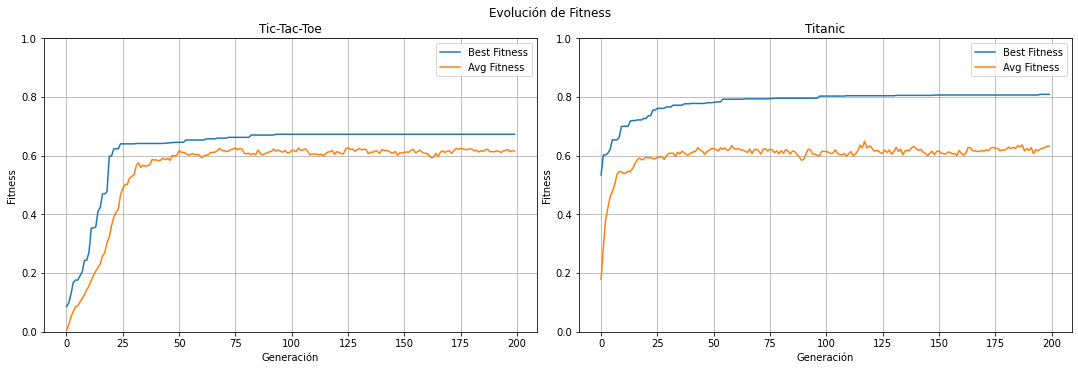

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Evolución de Fitness")
fig.tight_layout()
for axis, points, title in zip(ax.flatten(), [[clf_tic.log_best_fitness, clf_tic.log_avg_fitness], [clf_tita.log_best_fitness, clf_tita.log_avg_fitness]], ['Tic-Tac-Toe', 'Titanic']):
    axis.set_title(title)
    axis.set_xlabel("Generación")
    axis.set_ylabel("Fitness")
    axis.set_ylim([0, 1])
    axis.grid(True)
    axis.plot(list(range(len(points[0]))), points[0])
    axis.plot(list(range(len(points[1]))), points[1])
    axis.legend(['Best Fitness', 'Avg Fitness'])

Por último, en las gráficas se muestran la evolución del fitness tanto del mejor individuo de cada generación como de la media de la población. Ambas figuras muestran un comportamiento muy similar al esperado.

El fitness del mejor individuo siempre está por encima del fitness medio de la población, evidentemente. Además, se ve como en las primeras generaciones ambos fitness crecen de forma muy rápida, debido a la gran variedad genética de la población (hay muchos individuos generados de forma aleatoria cuyas soluciones son muy malas al problema y por lo tanto el fitness es muy bajo, pero en cuanto se ejecutan varias generaciones estos rápidamente mejoran). 

Alrededor de la generación 50, el fitness de la población empieza a estancarse, puesto que probablemente ha llegado a la solución óptima al problema o al menos a un máximo local. La variabilidad genética va decreciendo, todos los cromosomas empiezan a parecerse más entre ellos y por lo tanto el fitness mejora de una forma mucho menos pronunciada (dependiendo mucho más de las mutaciones para evoulcionar favorablemente). 

# Apartado 5

In [30]:
confusion_matrices_tic, confusion_matrices_tita = [], []
classifiers_tic, classifiers_tita = [ClasificadorNaiveBayes(), AlgoritmoGenetico(vals_por_attr_tic, m=5, cruce='intra', mutacion='std_single', n=150, n_epoch=200, debug=True)], [ClasificadorNaiveBayes(), AlgoritmoGenetico(vals_por_attr_titanic, m=8, cruce='intra', mutacion='std_single', n=150, n_epoch=150, debug=True)]

for csf in classifiers_tic:
    confusion_matrices_tic.append(csf.matriz_confusion(particion, datos_tic_tac, seed))
    
for csf in classifiers_tita:
    confusion_matrices_tita.append(csf.matriz_confusion(particion, datos_titanic, seed))
    
roc_points_tic = [[m[0][1] / sum(m[:, 1]), m[0][0] / sum(m[:, 0])] for m in confusion_matrices_tic]
roc_points_tita = [[m[0][1] / sum(m[:, 1]), m[0][0] / sum(m[:, 0])] for m in confusion_matrices_tita]

GEN 000: Max=0.0860, Mean=0.0036, Std=0.00922637
GEN 005: Max=0.1760, Mean=0.0890, Std=0.03744226
GEN 010: Max=0.3233, Mean=0.1600, Std=0.05554391
GEN 015: Max=0.4133, Mean=0.2668, Std=0.07606482
GEN 020: Max=0.5450, Mean=0.3429, Std=0.09143741
GEN 025: Max=0.6037, Mean=0.4479, Std=0.09951334
GEN 030: Max=0.6402, Mean=0.5386, Std=0.07722319
GEN 035: Max=0.6402, Mean=0.5676, Std=0.06110643
GEN 040: Max=0.6402, Mean=0.5741, Std=0.06278538
GEN 045: Max=0.6402, Mean=0.6057, Std=0.04329657
GEN 050: Max=0.6402, Mean=0.6089, Std=0.03986913
GEN 055: Max=0.6402, Mean=0.6134, Std=0.03650577
GEN 060: Max=0.6402, Mean=0.6215, Std=0.02759817
GEN 065: Max=0.6402, Mean=0.6226, Std=0.03319417
GEN 070: Max=0.6441, Mean=0.6250, Std=0.03017650
GEN 075: Max=0.6441, Mean=0.6274, Std=0.03354746
GEN 080: Max=0.6688, Mean=0.6094, Std=0.05336775
GEN 085: Max=0.6688, Mean=0.6150, Std=0.05337498
GEN 090: Max=0.6806, Mean=0.6144, Std=0.06287833
GEN 095: Max=0.6884, Mean=0.6249, Std=0.06323497
GEN 100: Max=0.6884,

In [31]:
confusion_matrices_tic = pd.DataFrame(np.concatenate(confusion_matrices_tic, axis=1),
                       columns=['Real C1 NB', 'Real C2 NB', 'Real C1 Gen', 'Real C2 Gen'],
                       index=['Estimado C1', 'Estimado C2'])
confusion_matrices_tic = confusion_matrices_tic.style.set_caption('Tic-Tac-Toe')

confusion_matrices_tita = pd.DataFrame(np.concatenate(confusion_matrices_tita, axis=1),
                       columns=['Real C1 NB', 'Real C2 NB', 'Real C1 Gen', 'Real C2 Gen'],
                       index=['Estimado C1', 'Estimado C2'])
confusion_matrices_tita = confusion_matrices_tita.style.set_caption('Titanic')

display(confusion_matrices_tic)
display(confusion_matrices_tita)

,Real C1 NB,Real C2 NB,Real C1 Gen,Real C2 Gen
Estimado C1,112.000000,38.000000,114.000000,33.000000
Estimado C2,23.000000,18.000000,21.000000,23.000000


,Real C1 NB,Real C2 NB,Real C1 Gen,Real C2 Gen
Estimado C1,46.000000,18.000000,37.000000,3.000000
Estimado C2,29.000000,116.000000,38.000000,131.000000


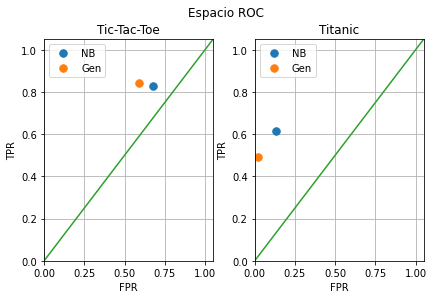

In [32]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("Espacio ROC")
fig.tight_layout()
for axis, points, title in zip(ax.flatten(), [roc_points_tic, roc_points_tita], ['Tic-Tac-Toe', 'Titanic']):
    axis.set_title(title)
    axis.set_xlabel("FPR")
    axis.set_ylabel("TPR")
    axis.set_xlim([0, 1.05])
    axis.set_ylim([0, 1.05])
    axis.grid(True)
    for i in range(2):
        axis.plot(points[i][0], points[i][1], '.', ms=15)
    axis.plot([0,2], [0,2])
    axis.legend(['NB', 'Gen'])

Como se puede observar, los resultados obtenidos son muy parecidos entre ambos clasificadores. En el caso de `Tic-Tac-Toe`, ambos clasificadores son ligeramente mejores que un clasificador aleatorio, pero no por mucho. En cambio, en el caso de `Titanic` los resultados parecen mejorar ligeramente (se encuentran más alejados de la diagonal).